In [3]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils
import qrcode
#from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

float32


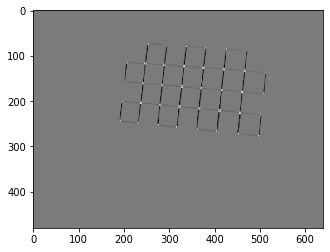

In [49]:
#src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.GaussianBlur(src, (25,25), 0)


#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


imshow("", harris_norm)

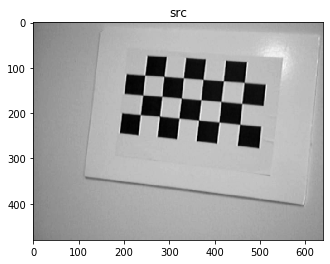

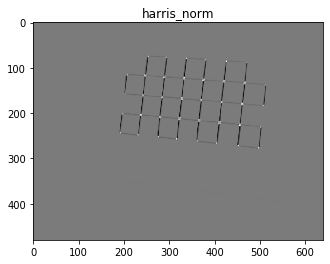

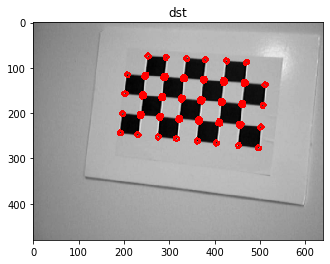

In [52]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
 


for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 130:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

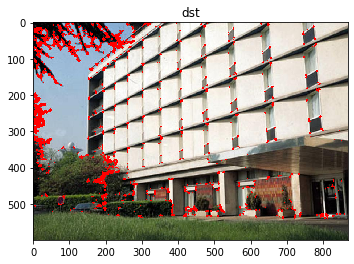

In [42]:
gray = cv2.imread('building.jpg', 0)
img = cv2.imread('building.jpg')
dst = cv2.cornerHarris(gray, 5, 3, 0.04)
img[dst>0.01*dst.max()]=[0,0,255]
imshow('dst',img)

In [39]:
a = np.array([[1,2,4], [7,0,1] ])
print(a)
b = a > 3
print(b)
a[b] = 100b
print(a)

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


In [3]:
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)
print(len(keypoints))

print(keypoints[0].pt)
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]

x, y = keypoints[0].pt




92
(254.0, 75.0)


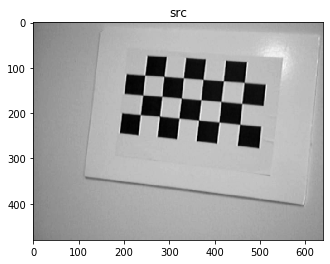

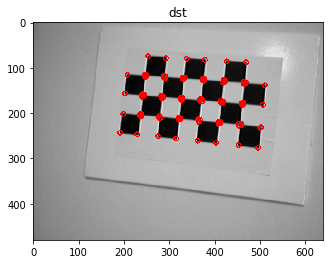

True

In [4]:

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)
cv2.imwrite("out.png", dst)

(480, 640)


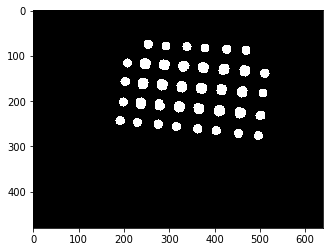

In [10]:
mask = np.zeros( src.shape, dtype='uint8')
print(mask.shape)
for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 10, (255, 255, 255), -1)      
        
imshow("", mask)       

38


38


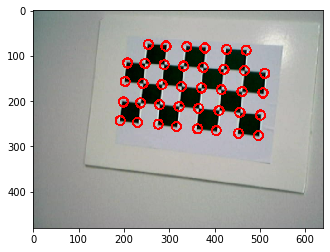

[[497, 276], [453, 271], [404, 265], [363, 261], [316, 256], [276, 251], [230, 247], [192, 243], [502, 231], [456, 225], [410, 221], [365, 216], [322, 212], [279, 208], [237, 204], [199, 202], [507, 182], [461, 179], [415, 175], [371, 171], [327, 168], [284, 164], [242, 161], [203, 157], [511, 139], [466, 133], [421, 130], [375, 126], [332, 123], [289, 120], [208, 116], [247, 117], [470, 88], [427, 86], [379, 83], [339, 80], [293, 79], [254, 75]]


In [18]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

src = cv2.imread('chessboard.jpg')
points = []
for con in contours :
    M = cv2.moments(con, True)
    #print(M)
    cx  = int(M['m10'] / M['m00'])
    cy  = int(M['m01'] / M['m00'])    
    cv2.circle(src, (cx,cy ), 10, (0,0, 255), 3)          
    points.append([cx, cy ])
imshow("", src)
print(points)

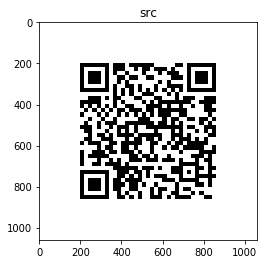

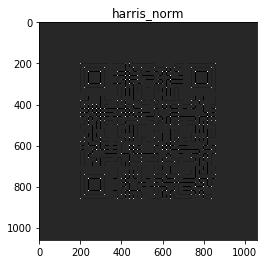

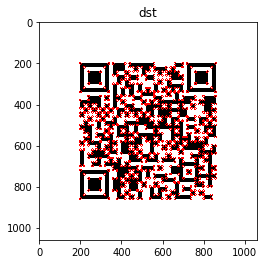

In [23]:
src = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

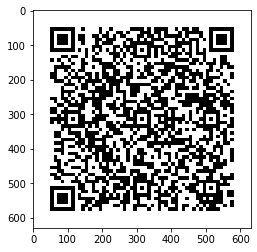

In [10]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 10,
     border = 5)

#url = 'http://www.naver.com'
url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
qr.add_data(url)
qr.make()

img = qr.make_image(fill_color="black", back_color="white")

plt.imshow(img, cmap="gray")

img.save("qrcode.png")

https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8


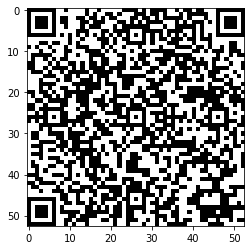

In [11]:
image = cv2.imread('qrcode.png')
#image = cv2.imread('3.png')
#image = cv2.imread('barqr.png')
qrDecoder = cv2.QRCodeDetector()
data,bbox,rectifiedImage = qrDecoder.detectAndDecode(image)

print(data)

imshow("", rectifiedImage )